In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

### Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [225]:
flights_tsk10 = pd.read_csv('data/flights_no_outlier_iqr.csv').drop(columns=['Unnamed: 0','Unnamed: 0.1'])
passengers_tsk10 = pd.read_csv('data/passengers_cleaned.csv')
fuel_consum_task10 = pd.read_csv('data/fuel_consumption_2019_cleaned.csv').drop(columns=['Unnamed: 0'])

In [226]:
#take the positive delays; this is for visualisation
flights_ps_delay = flights_tsk10.loc[flights_tsk10['dep_delay'] >= 0]
flights_ps_delay['fl_date'] = pd.to_datetime(flights_ps_delay['fl_date'],format='%Y/%m/%d')
flights_ps_delay['month'] = flights_ps_delay['fl_date'].dt.month
flights_ps_delay['year'] = flights_ps_delay['fl_date'].dt.year

In [227]:
#we will be taking 2019
flights_ps_delay_2019 = flights_ps_delay.loc[(flights_ps_delay['year'] == 2019)]

In [264]:
#making Dataframe for average delay per month per carrier
avg_car_del_2019 = flights_ps_delay_2019.groupby(['op_unique_carrier','month'])['dep_delay'].mean()
avg_car_del_2019 = pd.DataFrame(avg_car_del_2019).reset_index()

In [265]:
avg_car_del_2019.head()

,op_unique_carrier,month,dep_delay
0,9E,1,9.156863
1,9E,2,7.983607
2,9E,3,9.307692
3,9E,4,8.061538
4,9E,5,8.534483


In [266]:
#taking only june for comparison with fuel consumption
avg_car_del_june_2019 = avg_car_del_2019.loc[avg_car_del_2019['month'] == 6]

In [171]:
#We cant write a for loop to go by 12 month, some carriers have no flights for some months
#fl_9E = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[:12]
#fl_9K = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[12:18]
#fl_AA = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[18:29]
#fl_AS = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[29:41]
#fl_AX = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[41:53]
#fl_B6 = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[53:65]
#fl_C5 = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[65:77]
#fl_Cp = flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[77:89]
#flights_ps_delay.groupby(['op_unique_carrier','month'])['dep_delay'].mean()[89:100]

### Find out distance covered monthly by different air carriers

In [276]:
#Panda Dataframe form average distance per month per carrier
avg_car_dist_2019 = flights_ps_delay_2019.groupby(['op_unique_carrier','month'])['distance'].mean()
avg_car_dist_2019 = pd.DataFrame(avg_car_dist_2019).reset_index()
avg_car_dist_2019.head()

,op_unique_carrier,month,distance
0,9E,1,481.980392
1,9E,2,535.081967
2,9E,3,496.557692
3,9E,4,459.769231
4,9E,5,418.000000


In [277]:
#only moth june for comparison with fuel consumption
avg_car_dist_june_2019 = avg_car_dist_2019.loc[avg_car_dist_2019['month'] == 6]

## Find out total fuel comsumption per air carrier.

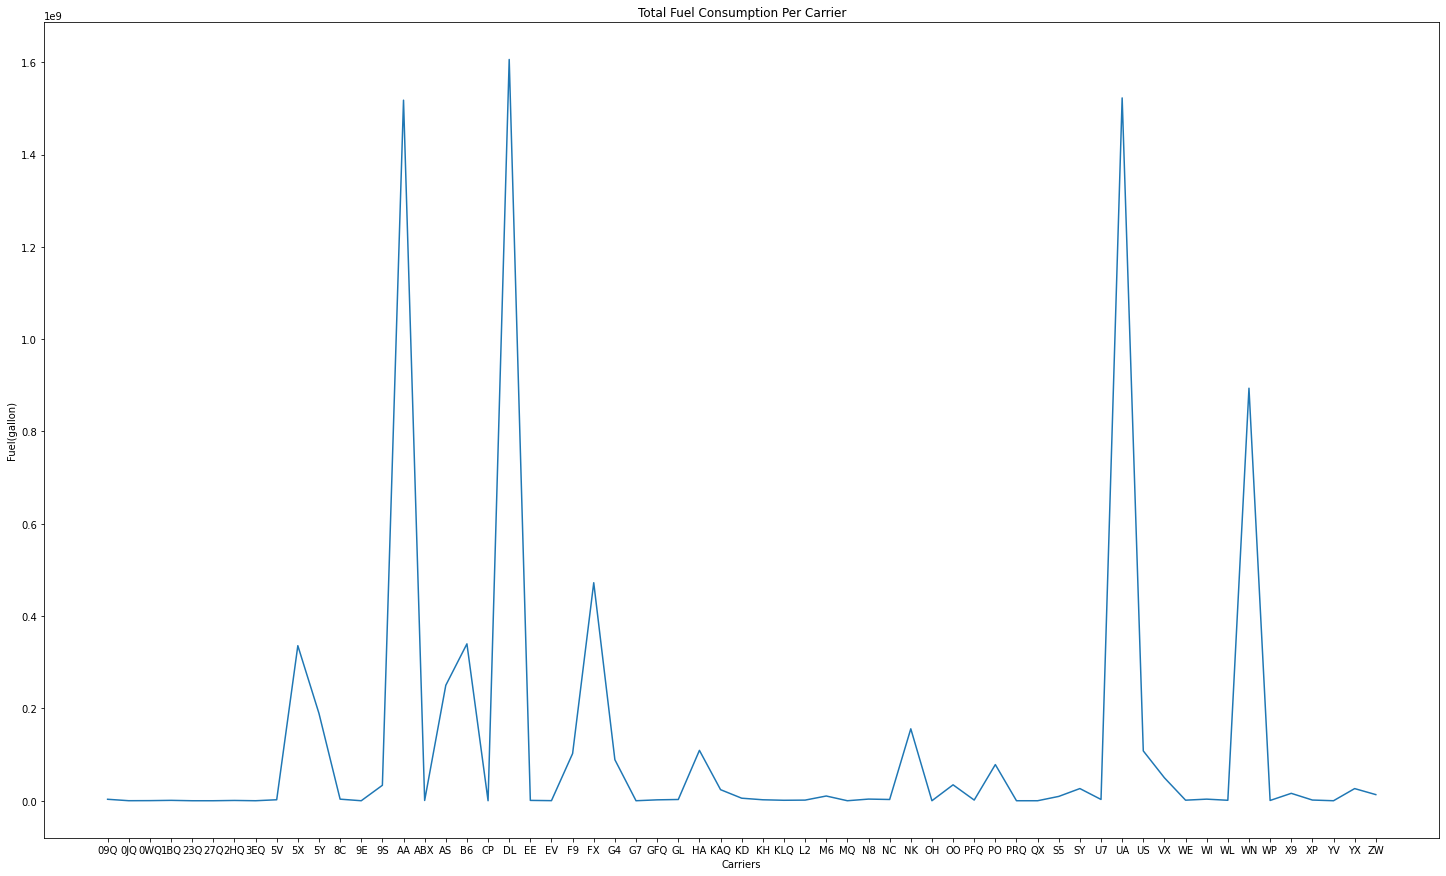

In [257]:
fuel_per_carrier = fuel_consum_task10.groupby('unique_carrier')['total_gallons'].sum()
fig, axes = plt.subplots(figsize=(25, 15))
sns.lineplot(ax=axes, x=fuel_per_carrier_june.index, y=fuel_per_carrier_june.values)
axes.set_title('Total Fuel Consumption Per Carrier')
axes.set_xlabel('Carriers')
axes.set_ylabel('Fuel(gallon)')
plt.show()

In [249]:
#only month june 2019 for fuel consumption
fuel_consump_2019_june = fuel_consum_task10.loc[(fuel_consum_task10['year'] == 2019) & (fuel_consum_task10['month'] == 6)]
fuel_consump_2019_june_per_carr = fuel_consump_2019_june.groupby('unique_carrier')['total_gallons'].sum()

### Plotting Fuel and Delay For Month Of June 2019

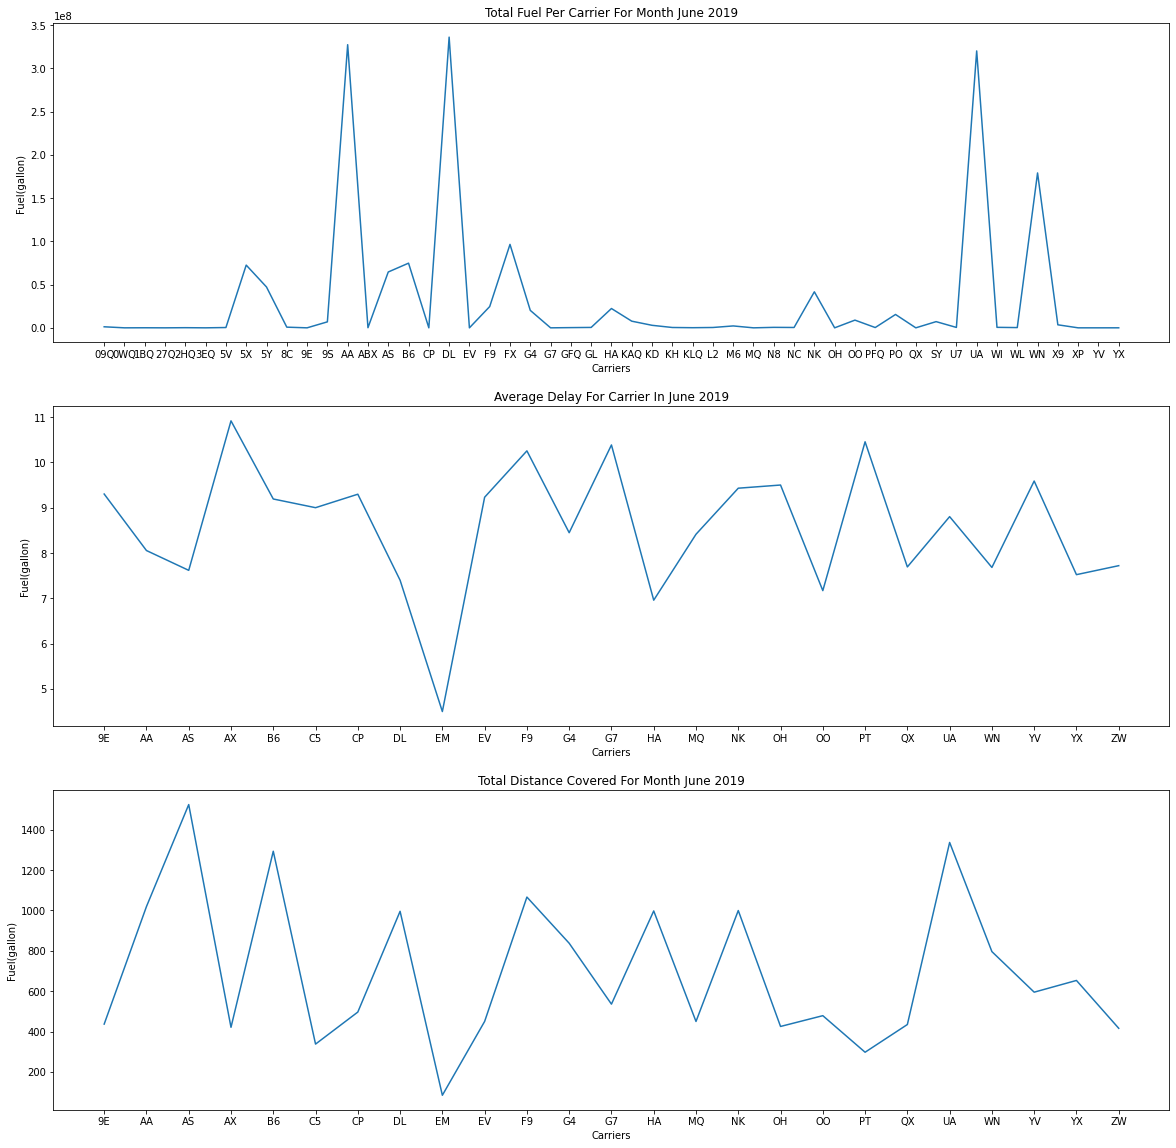

In [283]:
fig, axes = plt.subplots(3,1,figsize = (20,20))
sns.lineplot(ax=axes[0], x=fuel_consump_2019_june_per_carr.index, y=fuel_consump_2019_june_per_carr.values)
axes[0].set_title('Total Fuel Per Carrier For Month June 2019')
axes[0].set_xlabel('Carriers')
axes[0].set_ylabel('Fuel(gallon)')

sns.lineplot(ax=axes[1], x='op_unique_carrier',y='dep_delay',data=avg_car_del_june_2019)
axes[1].set_title('Average Delay For Carrier In June 2019')
axes[1].set_xlabel('Carriers')
axes[1].set_ylabel('Fuel(gallon)')

sns.lineplot(ax=axes[2], x='op_unique_carrier',y='distance',data=avg_car_dist_june_2019)
axes[2].set_title('Total Distance Covered For Month June 2019')
axes[2].set_xlabel('Carriers')
axes[2].set_ylabel('Fuel(gallon)')

plt.show()